# KNN imputer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/AK/Desktop/project/Train.csv")

In [3]:
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.drop('Embarked',axis=1,inplace=True)

In [4]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [5]:
# Import Label encoder
from sklearn import preprocessing


l=['Sex']
for i in l:
    label_encoder=preprocessing.LabelEncoder()
    
    label_encoder.fit(df[i])
    print(i,label_encoder.classes_)
    
    df[i]=label_encoder.transform(df[i])
    
df.head()

# 0-female 1-male

Sex ['female' 'male']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


<AxesSubplot:>

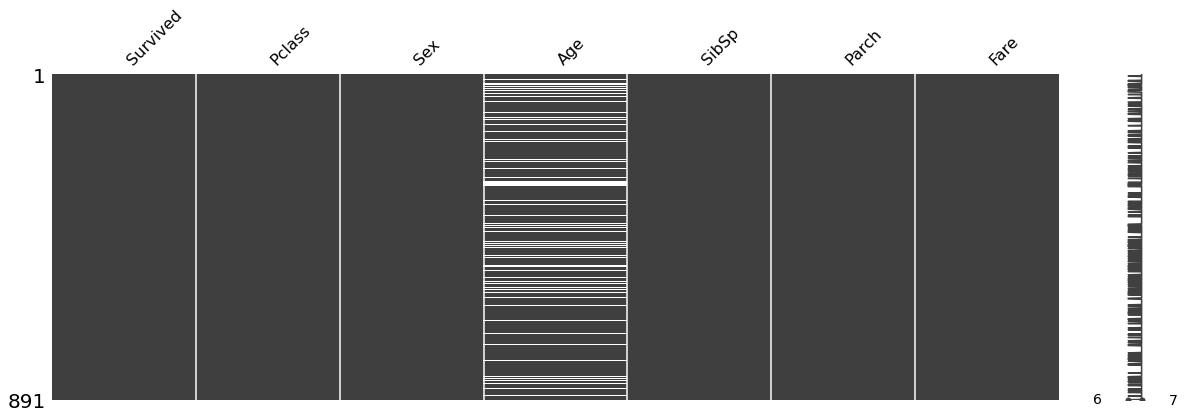

In [6]:
import missingno as mno
mno.matrix(df, figsize = (20, 6))

# Fill out missing values by KNN imputer

In [7]:
from sklearn.impute import KNNImputer

impute_knn=KNNImputer(n_neighbors=15); impute_knn
a=impute_knn.fit_transform(df); print(a)
df1=pd.DataFrame(a)
df1

[[ 0.      3.      1.     ...  1.      0.      7.25  ]
 [ 1.      1.      0.     ...  1.      0.     71.2833]
 [ 1.      3.      0.     ...  0.      0.      7.925 ]
 ...
 [ 0.      3.      0.     ...  1.      2.     23.45  ]
 [ 1.      1.      1.     ...  0.      0.     30.    ]
 [ 0.      3.      1.     ...  0.      0.      7.75  ]]


,0,1,2,3,4,5,6
0,0.0,3.0,1.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,0.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,0.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,0.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,1.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,0.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,0.0,26.066667,1.0,2.0,23.4500
889,1.0,1.0,1.0,26.000000,0.0,0.0,30.0000


In [8]:
df1.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [9]:
y=df1.iloc[:,[0]]; #print(y)
x=df1.iloc[:,[1,2,3,4,5,6]];#print(x)
np.shape(x)

(891, 6)

In [10]:
from sklearn.model_selection import train_test_split

x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.3,random_state=101)
print(x_tr.shape)
print(x_te.shape)

(623, 6)
(268, 6)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=15)

In [12]:
knn.fit(x_tr,y_tr)

<ipython-input-12-46ebb5a5ce40>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_tr,y_tr)


KNeighborsClassifier(n_neighbors=15)

In [13]:
# Prediction
y_pred1=knn.predict(x_te)
y_pred1

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0.

In [14]:
#import scikit-learn metrics module for aaccuracy calculation
from sklearn import metrics

from sklearn.metrics import accuracy_score
#model accuracy

print("Accuracy:",metrics.accuracy_score(y_te,y_pred1))

Accuracy: 0.6940298507462687


In [15]:
# MAE,MSE and RMSE
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

MAE1=mean_absolute_error(y_te,y_pred1)
MSE1=mean_squared_error(y_te,y_pred1)
RMSE1=sqrt(MSE1)

print("MAE1: ",MAE1)
print("MSE1: ",MSE1)
print("RMSE1: ",RMSE1)

MAE1:  0.30597014925373134
MSE1:  0.30597014925373134
RMSE1:  0.5531456853792962


# Evaluating  using logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lm=LogisticRegression(solver='liblinear',random_state=101).fit(x_tr,y_tr)

C:\Users\AK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [17]:
print("R square : ", lm.score(x_tr,y_tr))

R square :  0.812199036918138
